In [9]:
from notion2pandas import Notion2PandasClient
import sys
sys.path.append('../../')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import constants 
import numpy as np
import scipy.constants as cs

n2p = Notion2PandasClient(auth=constants.NOTION_TOKEN)
notion_df = n2p.from_notion_DB_to_dataframe(constants.NOTION_DB_ID)

colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

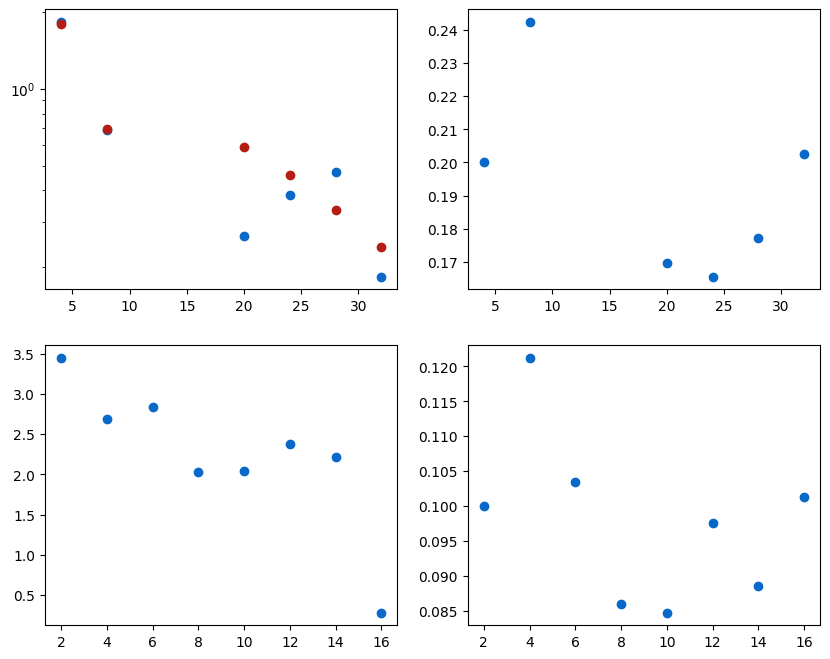

In [ ]:
# ours 
gap = np.array([158, 158, 145, 123, 118, 33, 20, 17.4375])
qc = [0.184,  0.4734, 0.3847,0.1394, 0.2640, 0.6906, 1.825, 15.88]

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
freq = np.array([6.7, 6.5, 6.2, 5.9, 7.2, 7.0])
gap = np.array([158, 158, 145, 118, 33, 20])
qc = [0.184,  0.4734, 0.3847, 0.2640, 0.6906, 1.825]
pin = np.array([32, 28, 24, 20, 8, 4])
ax[0].semilogy(pin, qc, 'o')
ax[0].plot(pin, gap/pin**2/freq**2*70, 'o')
#ax[0].plot(pin, 0.9*gap/pin**1.65, 'o')
ax[1].plot(pin, pin/gap,'o')
#ax[0].plot(pin, 600*pin**2/gap**3)
# 3.2 mil / gap 4 / space 33 
# 1.8 mil / gap 4 / space 20 

# 0.7 mil / gap 8 / space 33
# 2.027 mil / gap 8 / space 93 

# 3.2 mil / gap 16 / space 158 
# 0.264 mil / gap 20 / space 118 
gap = np.array([20, 33, 58, 93, 118, 123, 158, 158])
qc = [3.447,	2.683,2.838,	2.027,	2.044,	2.383,	2.219,	0.2815]
pin = np.array([2, 4, 6, 8, 10, 12, 14, 16])

ax[2].plot(pin, qc, 'o')
#ax[2].plot(pin, 1e8*pin**2/gap**4)
ax[3].plot(pin, pin/gap,'o')


# List of Qcs compared to rudimentary model

[0.03544691 0.01320803 0.00929037 0.00766297 0.01115792 0.00723202
 0.00624287]


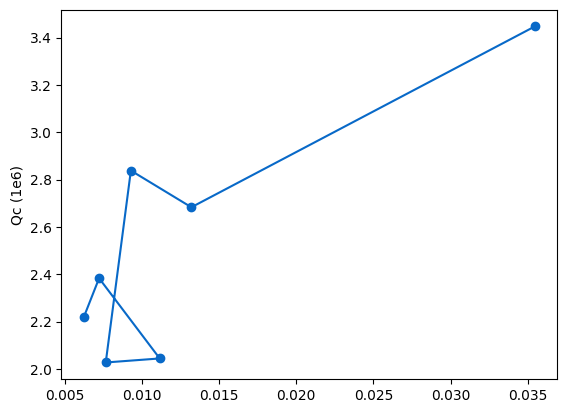

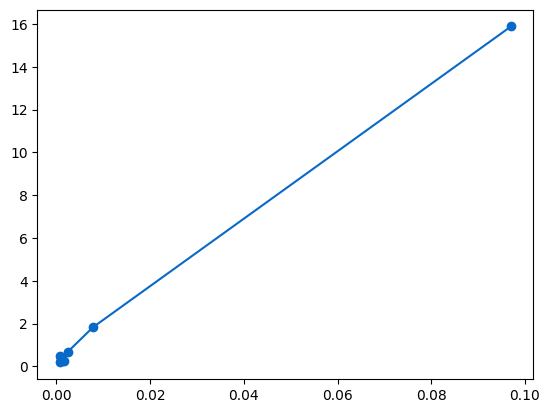

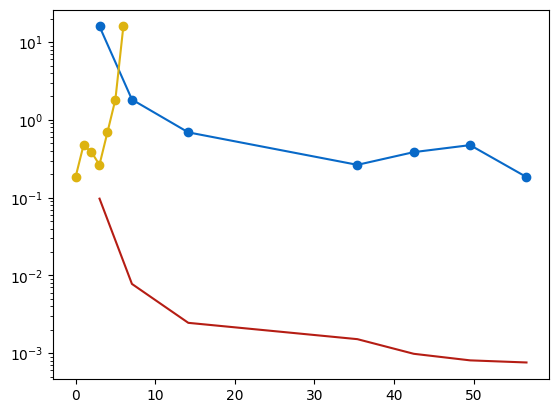

In [ ]:
# houck 
x = np.linspace(0, 0.04)

gap = np.array([20, 33, 58, 93, 118, 123, 158])
# freq = np.array([6.7, 7.64, 7.53, 8.04, 6.01, 6.34, 6.7]) sil 
freq = np.array([6.71, 7.06, 7.44, 7.78, 5.81, 6.14, 6.42])  # saph 
qc = [3.447,	2.683,2.838,	2.027,	2.044,	2.383,	2.219]
pin = np.array([2, 4, 6, 8, 10, 12, 14])*2.39

plt.figure()
plt.plot(gap/pin**2/freq**2, qc,'o-')

#plt.plot(gap/pin**1.65, qc,'o')
#plt.plot((pin/gap)**2/f**2, qc,'o')
#plt.plot((pin/gap), qc,'o')
#plt.xlabel('Separation/Pin')
plt.ylabel('Qc (1e6)')
#plt.plot(x, 100*x, label='fit')
print(gap/pin**2/freq**2)
# x = np.linspace(0, 6)
# plt.plot(x, 0.8*x, label='fit')

# our design 

freq = np.array([6.97, 6.67, 6.3, 6, 7.24, 7.04, 7.97])
#gap = np.array([158, 158, 145, 118, 33, 20, 17.44])

gap = np.array([100, 70, 52, 50, 7.5, 1, 37.5]) + 18.3
qc = [0.184,  0.4734, 0.3847, 0.2640, 0.6906, 1.825, 15.88]
pin = np.array([32, 28, 24, 20, 8, 4, 1.7])*1.77

plt.figure()
plt.plot(gap/pin**2/freq**2, qc,'o-')


# Silicon QC adj vs super basic model

Text(0, 0.5, 'Qc (1e6)')

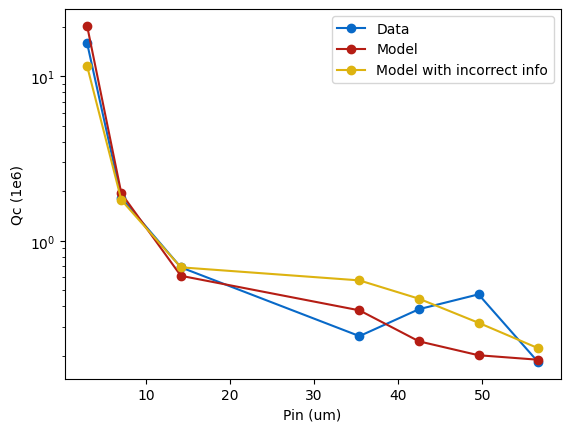

In [10]:
freq = np.array([6.97, 6.67, 6.3, 6, 7.24, 7.04, 7.97])
gap = np.array([100, 70, 52, 50, 7.5, 1, 37.5]) + 18.3
qc = [0.184,  0.4734, 0.3847, 0.2640, 0.6906, 1.825, 15.88]
pin = np.array([32, 28, 24, 20, 8, 4, 1.7])*1.77
zt = np.array([1, 1, 1, 1, 1, 1, 1.2])

plt.figure()
plt.semilogy(pin, qc,'o-', label='Data')
plt.plot(pin, 250*gap/pin**2/freq**2/zt,'o-', label='Model')

gap = np.array([158, 158, 145, 118, 33, 20, 17.44])
plt.semilogy(pin,  zt**3*2.2e2*gap/pin**2/freq**2,'o-', label='Model with incorrect info')

plt.xlabel('Pin (um)')
plt.legend()
plt.ylabel('Qc (1e6)')

# Numerical comparisons for resonators that are on both chips 

In [ ]:
# 8 is 7.84, 4 is 6.85 # houck
# 8 is 7.24, 4 is 7.04 # ours
n = 1.8
qc_prox_over_qc = 100*32/4**n/6.85**2/3.2
print(f"Qc prox, 4 um houck: {qc_prox_over_qc}")

qc_prox_over_qc = 100*20/4**n/7.04**2/1.8
print(f"Qc prox, 4 um ours: {qc_prox_over_qc}")

qc_prox_over_qc = 100*93/8**n/7.84**2/2.027
print(f"Qc prox, 8 um houck: {qc_prox_over_qc}")

qc_prox_over_qc = 100*33/8**n/7.24**2/0.7
print(f"Qc prox, 8 um ours: {qc_prox_over_qc}")

# 3.2 mil / gap 4 / space 33 
print(32/4/3.2)
# 1.8 mil / gap 4 / space 20 
print(20/4/1.8)

# 2.027 mil / gap 8 / space 93 
print(93/8/2.027)

# 0.7 mil / gap 8 / space 33
print(33/8/0.7)

print(158/16/3.2)

print(118/20/0.264)

Qc prox, 4 um houck: 1.7575628839747643
Qc prox, 4 um ours: 1.848860686573339
Qc prox, 8 um houck: 1.767808012179976
Qc prox, 8 um ours: 2.1299862058515893


# Equations from Martinis paper

In [110]:
eps_sil = 11.7
eps_sapp = 9.4 
z0=50 


# Capacitance between two coplanar pins with ground on either side, where w is defined to be gap center to gap center distance, all gaps the same
def cc(eps, w, s): 
    return 2 * eps / np.pi * np.log(4 *w /s * w / (2*w - s/4))

# Convert to actual width 
def ccp1(eps, wp, s): 
    return cc(eps, wp+s, s)

# Same as above, adding a ground of size d between them (but all gaps the same size)
def cc2(eps, w, s, d): 
    return -2 * eps / np.pi * np.log(1 - (w - s/4)**2/(d+w)**2)

def ccp2(eps, wp, s, dp): 
    return cc2(eps, wp+s, s, dp+s)

# Equation 14 -- 2 wires with some separation; this seems to be the best
def ccp(eps, w, s): 
    return 2 * eps / np.pi * np.log((w+s)/s)

# Convert the capacitances to physical units
def c1(eps, wp, s, l): 
    return ccp1(eps/2+1/2, wp, s)*cs.epsilon_0 * l

def c(eps, wp, s, l): 
    return ccp(eps/2+1/2, wp, s)*cs.epsilon_0 * l

def c2(eps, wp, s, l, gd): 
    return ccp2(eps/2+1/2, wp, s, gd)*cs.epsilon_0 * l

# Convert those to Qc
# For width, we use the pin width, for sep, we use the total separation. Then width of pin
def qc_func1(eps, wp, s, l, z, f): 
    return np.pi/2 / (2*np.pi)**2 / f**2 / z0 / z / c1(eps, wp, s, l)**2 

def qc_func(eps, wp, s, l, z, f): 
    return np.pi/2 / (2*np.pi)**2 / f**2 / z0 / z / c(eps, wp, s, l)**2 

def qc_func2(eps, wp, s, l, gd, z, f): 
    return np.pi/2 / (2*np.pi)**2 / f**2 / z0 / z / c2(eps, wp, s, l, gd)**2 

In [221]:
15/8.3

1.8072289156626504

In [222]:
coef2

0.34740000000000004

In [219]:
def get_Qc_info(eps, fln, gap, wid, par, fsep, f):
    print(f'Gap width: {wid*1e6:.1f} um, separation: {fsep*1e6:.1f} um, coupling gap: {gap*1e6:.1f} um')

    # width, sep, length, ground 
    c_direct = c(eps, fln, gap, wid*rat)
    c_long = c2(eps, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep)
    q1 = 1e-6*coef*qc_func(eps, fln, gap, wid*rat, 50, f)
    q2 = coef2*qc_func2(eps, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep, 50, f)/1e6
    print(f'Capacitance is {1e15*c_direct:.4f} fF for direct connection')
    print(f'Capacitance is {1e15*c_long:.4f} fF for long feedline connection')
    print(f'Quality intentional is {q1:.4f} million')
    print(f'Quality unintentional is {q2:.4f} million')
    qtot = 1/(1/q1 + 1/q2)
    print(f'Total q is {qtot:.4f} million')
    return c_direct, c_long, q1, q2

# Plot the models to compare them 

Text(0.5, 1.0, 'Compare models')

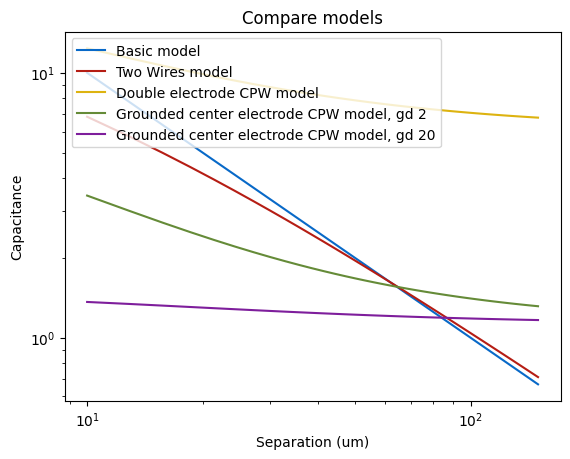

In [ ]:
sep = np.linspace(10, 150)
plt.figure()

#plt.loglog(sep, 0.92*ccp(eps_sil, 19, sep)) 
#plt.loglog(sep, 1.15*ccp(eps_sil, 10, sep)) 
plt.loglog(sep, 100/sep**(1), label='Basic model') 
plt.loglog(sep, ccp(eps_sil, 15, sep), label='Two Wires model')
plt.loglog(sep, ccp1(eps_sil, 15, sep), label='Double electrode CPW model')
plt.loglog(sep, ccp2(eps_sil, 15, sep,2), label='Grounded center electrode CPW model, gd 2')
plt.loglog(sep, ccp2(eps_sil, 15, sep,20), label='Grounded center electrode CPW model, gd 20')

plt.xlabel('Separation (um)')
plt.ylabel('Capacitance')
plt.legend()
plt.title('Compare models')

# Compare Qc from models for different pin width, epsilon, and ratios

Text(0.5, 1.0, 'Compare different aspects of Si and Sapp substrate')

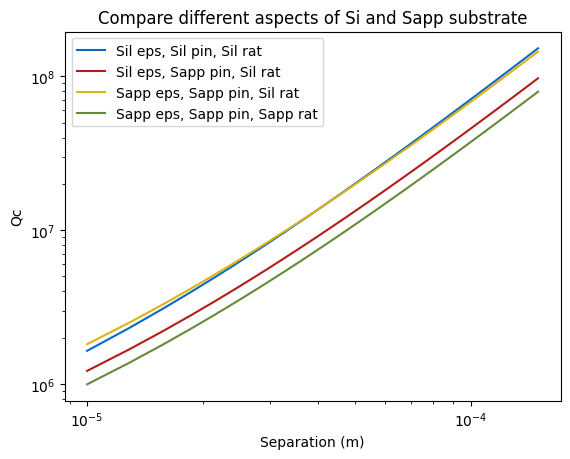

In [101]:
plt.figure() 
sep = np.linspace(10, 150)*1e-6
plt.loglog(sep, qc_func(eps_sil, 15e-6, sep, 8e-6*1.77, 50, 6.7e9), label='Sil eps, Sil pin, Sil rat') 
plt.loglog(sep, qc_func(eps_sil, 19e-6, sep, 8e-6*1.77, 50, 6.7e9), label='Sil eps, Sapp pin, Sil rat') 

plt.loglog(sep, qc_func(eps_sapp, 19e-6, sep, 8e-6*1.77, 50, 6.7e9), label='Sapp eps, Sapp pin, Sil rat') 
plt.loglog(sep, qc_func(eps_sapp, 19e-6, sep, 8e-6*2.39, 50, 6.7e9), label='Sapp eps, Sapp pin, Sapp rat') 
plt.legend()
plt.ylabel('Qc')
plt.xlabel('Separation (m)')
plt.title('Compare different aspects of Si and Sapp substrate')

# New silicon device, correct and incorrect gap, compared to model

Ratio of model to data:
[0.92675577 1.15995268 2.5138243  1.23739018 0.77409501 0.7871679
 1.89968358]
Standard deviation of ratio:


0.6011604578796484

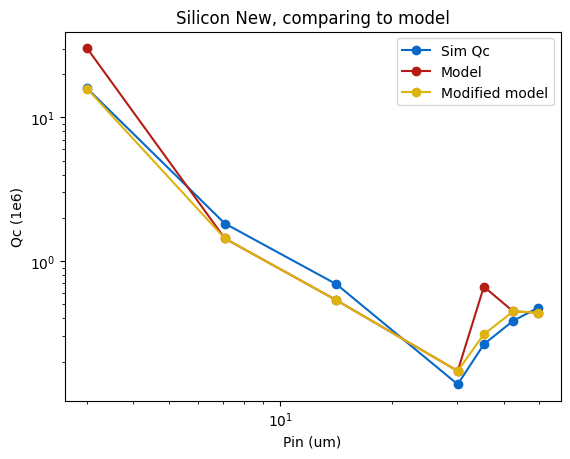

In [192]:
# Not actually used 
freq = np.array([6.97,  6.67, 6.3, 6, 7.604,7.24, 7.04, 7.97])*1e9
gap = np.array([100,  70, 52.5, 50,20, 7.5, 1, 37.5]) + 18.3
gap = gap * 1e-6  # convert to meters
qc = [0.184,  0.4734, 0.3847, 0.2640, 0.139, 0.6906, 1.825, 15.88]
pin = np.array([32,  28, 24, 20,17, 8, 4, 1.7])*1.77*1e-6
zt = np.array([1,  1, 1, 1,1.2, 1, 1, 1.2])*50


# Real data 
freq = np.array([6.67, 6.3, 6, 7.604,7.24, 7.04, 7.97])*1e9
gap = np.array([70, 52.5, 50,20, 7.5, 1, 37.5]) + 18.3
gap = gap * 1e-6  # convert to meters
qc = np.array([0.4734, 0.3847, 0.2640, 0.139, 0.6906, 1.825, 15.88])
pin = np.array([28,    24,     20,17, 8, 4, 1.7])*1.77*1e-6
zt = np.array([ 1, 1, 1,1.2, 1, 1, 1.2])*50

coef = 0.095

plt.figure()

plt.loglog(pin*1e6, np.array(qc), 'o-', label='Sim Qc') 
plt.loglog(pin*1e6, 1e-6*coef*qc_func(eps_sil, 15e-6, gap, pin, zt, freq), 'o-', label='Model') 

qc_mod = 1e-6*coef*qc_func(eps_sil, 15e-6, gap, pin, zt, freq)
qc_mod[6]=15.8
qc_mod[2]=0.31
plt.loglog(pin*1e6, qc_mod, 'o-', label='Modified model')

plt.legend()
plt.xlabel('Pin (um)')
plt.ylabel('Qc (1e6)')
plt.title('Silicon New, comparing to model')

print('Ratio of model to data:')
print(coef*qc_func(eps_sil, 15e-6, gap, pin, zt, freq)/np.array(qc)*1e-6)

print('Standard deviation of ratio:')
np.std(coef*qc_func(eps_sil, 15e-6, gap, pin, zt, freq)/np.array(qc)*1e-6)

# New silicon, but remove the 3 um, 20 um 32 um devices that had issues with placement 

Ratio of model to data:
[0.92675577 1.15995268 1.23739018 0.77409501 0.7871679 ]
Standard deviation of ratio:


0.19026604825551394

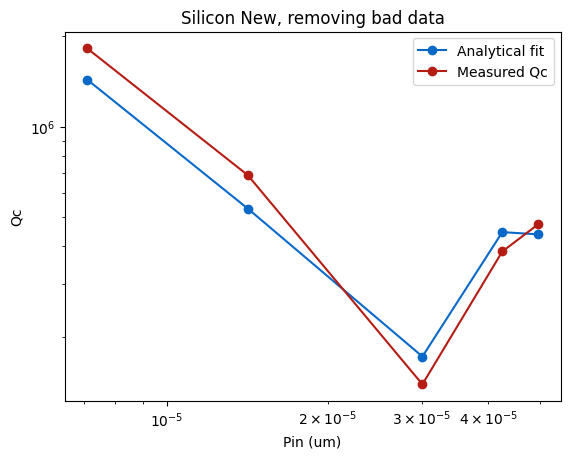

In [ ]:

freq = np.array([6.67, 6.3, 6, 7.604,7.24, 7.04])*1e9
gap = np.array([70, 52.5, 50,20, 7.5, 1]) + 18.3
gap = gap * 1e-6  # convert to meters
qc = [0.4734, 0.3847, 0.2640, 0.139, 0.6906, 1.825]
pin = np.array([28, 24, 20,17, 8, 4])*1.77*1e-6
zt = np.array([ 1, 1, 1,1.2, 1, 1])*50

# Remove 20 um one because it makes my data look better. [oh actually, it is in parallel to the feedline]
freq = np.array([6.67, 6.3,  7.604,7.24, 7.04])*1e9
gap = np.array([70, 52.5, 20, 7.5, 1]) + 18.3
gap = gap * 1e-6  # convert to meters
qc = [0.4734, 0.3847,  0.139, 0.6906, 1.825]
pin = np.array([28, 24, 17, 8, 4])*1.77*1e-6
zt = np.array([ 1, 1, 1.2, 1, 1])*50


plt.figure()
plt.loglog(pin, 0.095*qc_func(eps_sil, 15e-6, gap, pin, zt, freq), 'o-', label='Analytical fit') 
plt.loglog(pin, np.array(qc)*1e6, 'o-', label='Measured Qc') 
plt.xlabel('Pin (um)')
plt.title('Silicon New, removing bad data')
plt.ylabel('Qc')
plt.legend()

print('Ratio of model to data:')
print(coef*qc_func(eps_sil, 15e-6, gap, pin, zt, freq)/np.array(qc)*1e-6)

print('Standard deviation of ratio:')
np.std(coef*qc_func(eps_sil, 15e-6, gap, pin, zt, freq)/np.array(qc)*1e-6)

# Consider Q limitation from long run along the feedline

In [187]:
# 3 is 1800 / 340 
# 20 is 2000 / 340 

# feedline width, separation, pin width 
# the 8 is 1600 
# the 10 is 1800
fln = 15e-6
# feedline width, separation, pin width 
rat=1
fsep = 340e-6

f=7.99e9
gap=55e-6
wid=3e-6
par=1820e-6
coef2= 3.6 * coef
# width, sep, length, ground 
print(f'Capacitance is {1e15*c(eps_sil, fln, gap, wid*rat):4f} fF for direct connection')
# pin width, open width, length, groudned width 
print(f'Capacitance is {1e15*c2(eps_sil, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep):4f} fF for long feedline connection')

q1 = 1e-6*coef*qc_func(eps_sil, fln, gap, wid*rat, 50, f)
q2 =coef2*qc_func2(eps_sil, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep, 50, f)/1e6
print(f'Quality intentional is {q1:4f} million')
print(f'Quality unintentional is {q2:4f} million')
qtot =1/( 1/q1 + 1/q2)
print(f'Total q is {qtot:4f} million')

Capacitance is 0.025896 fF for direct connection
Capacitance is 0.055274 fF for long feedline connection
Quality intentional is 35.874699 million
Quality unintentional is 28.347233 million
Total q is 15.834909 million


In [184]:
coef=0.0965

In [188]:
rat=1.77
f=6e9
gap=68e-6
wid=20e-6
par=2020e-6

# width, sep, length, ground 
print(f'Capacitance is {1e15*c(eps_sil, fln, gap, wid*rat):4f} fF for direct connection')
# pin width, open width, length, groudned width 
print(f'Capacitance is {1e15*c2(eps_sil, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep):4f} fF for long feedline connection')

q1 = 1e-6*coef*qc_func(eps_sil, fln, gap, wid*rat, 50, f)
q2 =coef2*qc_func2(eps_sil, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep, 50, f)/1e6
print(f'Quality intentional is {q1:4f} million')
print(f'Quality unintentional is {q2:4f} million')
qtot =1/( 1/q1 + 1/q2)
print(f'Total q is {qtot:4f} million')

Capacitance is 0.252572 fF for direct connection
Capacitance is 0.509131 fF for long feedline connection
Quality intentional is 0.668768 million
Quality unintentional is 0.592500 million
Total q is 0.314164 million


In [171]:

# width, sep, length, ground 
print(f'Capacitance is {1e15*c(eps_sil, 15.5e-6, 55e-6, 3e-6):4f} fF for direct connection')
print(f'Capacitance is {1e15*c2(eps_sil, np.sqrt(15.5*3)*1e-6, np.sqrt(3*8)*1e-6, 1800e-6, 340e-6)} for long feedline connection')
coef2 = 4 * coef
q1 = 1e-6*coef*qc_func(eps_sil, 15.5e-6, 55e-6, 3e-6, 60, 8e9)
q2 = coef2*qc_func2(eps_sil, np.sqrt(15.5*3)*1e-6, np.sqrt(3*8)*1e-6, 1800e-6, 340e-6, 60, 8e9)/1e6
print(q1)
print(q2)
qtot =1/( 1/q1 + 1/q2)
print(f'Total q is {qtot}')

print(f'Capacitance is {1e15*c(eps_sil, 15.5e-6, 68e-6, 20e-6*1.77):4f} fF for direct connection')
# pin width, open width, length, groudned width 
print(f'Capacitance is {1e15*c2(eps_sil, np.sqrt(15.5*20*1.77)*1e-6, np.sqrt(20*8)*1e-6, 2000e-6, 340e-6)} for long feedline connection')

q1 = 1e-6*coef*qc_func(eps_sil, 15.5e-6, 68e-6, 20e-6*1.77, 50, 6e9)
q2 =coef2*qc_func2(eps_sil, np.sqrt(15.5*20*1.77)*1e-6, np.sqrt(20*8)*1e-6, 2000e-6, 340e-6, 50, 6e9)/1e6
print(q1)
print(q2)
qtot =1/( 1/q1 + 1/q2)
print(f'Total q is {qtot}')

Capacitance is 0.026660 fF for direct connection
Capacitance is 0.05580655836599237 for long feedline connection
27.698295252250883
25.285528076488696
Total q is 13.218487800063487
Capacitance is 0.260182 fF for direct connection
Capacitance is 0.5149928123827394 for long feedline connection
0.6204217009004724
0.6334303847030851
Total q is 0.31342928020920113


In [ ]:
# feedline width, separation, pin width 
# the 8 is 1600 
# the 10 is 1800


print(f'Capacitance is {1e15*c(eps_sil, 15.5e-6, 55e-6, 3e-6):4f} fF for direct connection')
print(f'Capacitance is {1e15*c2(eps_sil, np.sqrt(15.5*3)*1e-6, np.sqrt(3*8)*1e-6, 1800e-6, 330e-6)} for long feedline connection')
#print(f'Capacitance is {1e15*c2(eps_sil, np.sqrt(15.5*13.5)*1e-6, 8e-6, 1800e-6, 33)} for long feedline connection')
#print(f'Capacitance is {1e15*c2(eps_sil, np.sqrt(15.5*13.5)*1e-6, 8e-6, 1800e-6, 13)} for long feedline connection')
print(1e-6*coef*qc_func(eps_sil, 15e-6, 55e-6, 3e-6, 60, 8e9))
#print(qc_func(eps_sil, np.sqrt(15.5*3)*1e-6, 340e-6, 1800e-6, 60, 8e9))
print(coef*qc_func2(eps_sil, np.sqrt(15.5*3)*1e-6, np.sqrt(3*8)*1e-6, 1800e-6,330e-6, 60, 8e9)/1e6)

Capacitance is 0.026660 fF for direct connection
Capacitance is 0.05907457633582145 for long feedline connection
29.35735281250885
5.641327144727437


# My proposal for the next device

Text(0, 0.5, 'Qc')

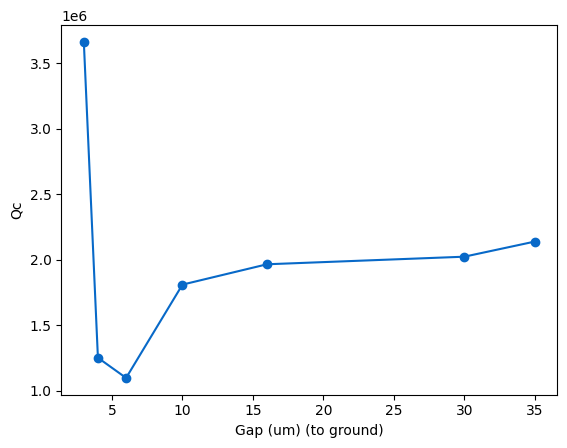

In [54]:
freq = np.array([6.97,7.604, 6.67, 6.3, 6, 7.54, 7.97])*1e9
gap = np.array([250, 130, 90, 40, 4, 1, -3]) + 18.3
gap = gap * 1e-6  # convert to meters

pitch = [35, 30, 16, 10, 6, 4, 3]
pin = np.array([35, 17, 16, 10, 6, 4, 1.7])*1.77*1e-6
zt = np.array([1, 1.2, 1, 1, 1, 1, 1.2])*50

plt.figure()
plt.plot(pitch, coef*qc_func(eps_sil, 15e-6, gap, pin, zt, freq), 'o-') 
plt.xlabel('Gap (um) (to ground)')
plt.ylabel('Qc')

# Actual next device

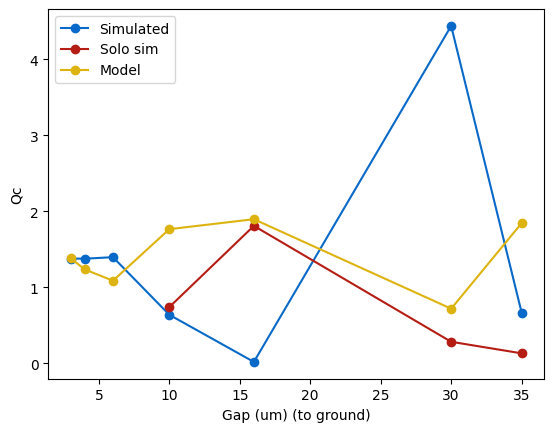

In [130]:
freq = np.array([7.505,7.913, 6.789, 6.378, 6.028, 7.588, 8.05])*1e9
gap = np.array([250, 130, 90, 40, 4, 1, -3]) + 18.3
gap = gap * 1e-6  # convert to meters

pitch = [35, 30, 16, 10, 6, 4, 3]
pin = np.array([35, 30, 16, 10, 6, 4, 3])*1.77*1e-6
zt = np.array([1, 1, 1, 1, 1, 1, 1])*50
qc = [0.67, 4.44, 0.02, 0.64, 1.398, 1.378, 1.38]

pitch2 = np.array([35, 30, 16, 10])
qc2 = [0.133, 0.285, 1.81, 0.7415]
plt.figure()
plt.plot(pitch, qc, 'o-', label='Simulated') 
plt.plot(pitch2, qc2, 'o-', label='Solo sim') 

plt.plot(pitch, 1e-6*coef*qc_func(eps_sil, 15e-6, gap, pin, zt, freq), 'o-', label='Model') 
plt.xlabel('Gap (um) (to ground)')
plt.ylabel('Qc')
plt.legend()

# Houck sapphire

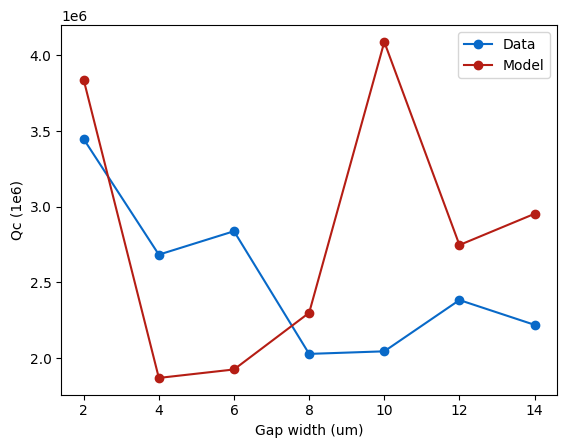

In [ ]:
freq = np.array([6.71, 7.06, 7.44, 7.78, 5.81, 6.14, 6.42])*1e9  # saph 
gap = np.array([20, 33, 58, 93, 118, 123, 158])*1e-6
qc = [3.447,	2.683,2.838,	2.027,	2.044,	2.383,	2.219]
pin = np.array([2, 4, 6, 8, 10, 12, 14])*2.38*1e-6

plt.figure()
plt.plot(pin/2.38*1e6, np.array(qc)*1e6, 'o-', label='Data')
plt.plot(pin/2.38*1e6, coef*qc_func(eps_sapp, 19.1e-6, gap, pin, 50, freq), 'o-', label='Model') 
#plt.loglog(pin/2.38, 3e-2*qc_func2(eps_sapp, 19.1e-6, gap, pin, 50, freq), 'o-') 
 
#plt.loglog(pin/2.38, 2e22*gap**1.4/pin**2/freq**2, 'o-') 
plt.xlabel('Gap width (um)')
plt.ylabel('Qc (1e6)')
plt.legend()

In [ ]:
# feedline width, separation, pin width 
rat=2.38
fsep = 489e-6
fln=19e-6
eps = eps_sapp
f=7.78e9
gap=93e-6
wid=8e-6
par=1620e-6

get_Qc_info(eps, fln, gap, wid, par, fsep, f);

wid = 10e-6
gap=118e-6
f=5.8e9
par=1820e-6
get_Qc_info(eps, fln, gap, wid, par, fsep, f);

Gap width: 8.0 um, separation: 489.0 um, coupling gap: 93.0 um
Capacitance is 0.1037 fF for direct connection
Capacitance is 0.1084 fF for long feedline connection
Quality intentional is 2.3208 million
Quality unintentional is 7.7776 million
Total q is 1.7874 million
Gap width: 10.0 um, separation: 489.0 um, coupling gap: 118.0 um
Capacitance is 0.1041 fF for direct connection
Capacitance is 0.1499 fF for long feedline connection
Quality intentional is 4.1435 million
Quality unintentional is 7.3188 million
Total q is 2.6457 million


In [220]:
print(f'Gap width: {wid*1e6:.1f} um, separation: {fsep*1e6:.1f} um, coupling gap: {gap*1e6:.1f} um')
# width, sep, length, ground 
print(f'Capacitance is {1e15*c(eps, fln, gap, wid*rat):.4f} fF for direct connection')
# pin width, open width, length, groudned width 
print(f'Capacitance is {1e15*c2(eps, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep):.4f} fF for long feedline connection')

q1 = 1e-6*coef*qc_func(eps, fln, gap, wid*rat, 50, f)
q2 =coef2*qc_func2(eps, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep, 50, f)/1e6

print(f'Quality intentional is {q1:.4f} million')
print(f'Quality unintentional is {q2:.4f} million')
qtot =1/( 1/q1 + 1/q2)
print(f'Total q is {qtot:.4f} million')

wid = 10e-6
gap=118e-6
f=5.8e9
par=1820e-6

print(f'Gap width: {wid*1e6:.1f} um, separation: {fsep*1e6:.1f} um, coupling gap: {gap*1e6:.1f} um')
# width, sep, length, ground 
print(f'Capacitance is {1e15*c(eps_sapp, fln, gap, wid*rat):.4f} fF for direct connection')
# pin width, open width, length, groudned width 
print(f'Capacitance is {1e15*c2(eps_sapp, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep):.4f} fF for long feedline connection')

q1 = 1e-6*coef*qc_func(eps_sapp, fln, gap, wid*rat, 50, f)
q2 =coef2*qc_func2(eps_sapp, np.sqrt(fln*wid*rat), np.sqrt(wid*8e-6), par, fsep, 50, f)/1e6

print(f'Quality intentional is {q1:.4f} million')
print(f'Quality unintentional is {q2:.4f} million')
qtot =1/( 1/q1 + 1/q2)
print(f'Total q is {qtot:.4f} million')

Gap width: 10.0 um, separation: 326.0 um, coupling gap: 118.0 um
Capacitance is 0.0719 fF for direct connection
Capacitance is 0.2565 fF for long feedline connection
Quality intentional is 8.1527 million
Quality unintentional is 2.3421 million
Total q is 1.8194 million
Gap width: 10.0 um, separation: 326.0 um, coupling gap: 118.0 um
Capacitance is 0.0589 fF for direct connection
Capacitance is 0.2101 fF for long feedline connection
Quality intentional is 12.9670 million
Quality unintentional is 3.7252 million
Total q is 2.8938 million


# Houck Sapphire, remove 10 

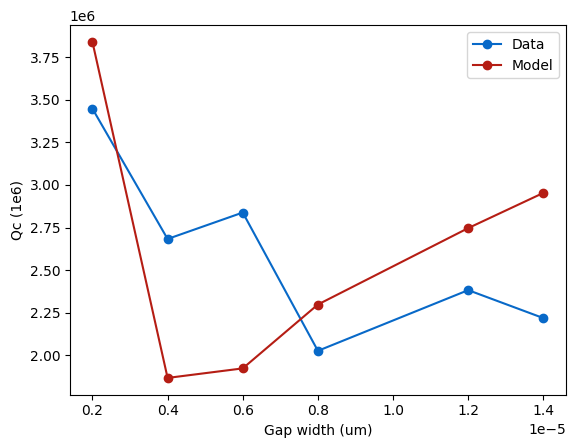

In [ ]:
gap = np.array([20, 33, 58, 93,  123, 158])*1e-6
freq = np.array([6.71, 7.06, 7.44, 7.78,  6.14, 6.42])*1e9  # saph 
qc = [3.447,	2.683,2.838,	2.027,	2.383,	2.219]
pin = np.array([2, 4, 6, 8, 12, 14])*2.38*1e-6
plt.figure()
 
#plt.loglog(pin/2.38, 3e-2*qc_func2(eps_sapp, 19.1e-6, gap, pin, 50, freq), 'o-') 
plt.plot(pin/2.38, np.array(qc)*1e6, 'o-', label='Data') 
plt.plot(pin/2.38, coef*qc_func(eps_sapp, 19.1e-6, gap, pin, 50, freq), 'o-', label='Model')
plt.xlabel('Gap width (um)')
plt.ylabel('Qc (1e6)')
plt.legend()

# Compare means

In [142]:
print(np.mean(0.0965*qc_func(eps_sapp, 19.1e-6, gap, pin, 50, freq))*1e-6)
np.mean(np.array(qc))

2.7082154909728513


2.7139999999999995

In [63]:
np.std(0.095*qc_func(eps_sapp, 19.1e-6, gap, pin, 50, freq)*1e-6/np.array(qc))

0.24416275251145997

# First silicon device (no simulation)

0.05751553716924715
4.821210086791083


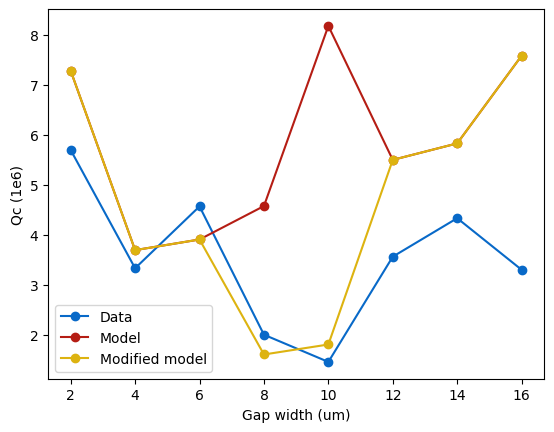

In [217]:
gap =  np.array([20,   33,     58,   93, 118,  123, 158, 218])*1e-6
freq = np.array([6.71, 7.06, 7.48, 7.99, 5.98, 6.32, 6.68, 6.99])*1e9  # saph 
pin = np.array([2,     4,     6,      8,   10, 12, 14, 16])*1.77*1e-6
qc = [5.69832, 3.3346, 4.57148333, 2.0056, 1.46146667, 3.56585, 4.33541667, 3.30411667]

plt.figure()
plt.plot(1e6*pin/1.77, np.array(qc), 'o-', label='Data')
plt.plot(1e6*pin/1.77, 1e-6*coef*qc_func(eps_sil, 14.18e-6, gap, pin, 50, freq), 'o-', label='Model') 

qc_mod=1e-6*coef*qc_func(eps_sil, 14.18e-6, gap, pin, 50, freq)
qc_mod[3]=1.61
qc_mod[4]=1.81
plt.plot(1e6*pin/1.77, qc_mod, 'o-', label='Modified model')

plt.xlabel('Gap width (um)')
plt.ylabel('Qc (1e6)')
plt.legend()

# c(eps, wp, s, l)
#def c2(eps, w, d, l): return cs.epsilon_0*(eps+1)/np.pi*(w/d)**2*l

# compare capacitance for the 8 um one 
print(1e15* c(eps_sil, 14.18e-6, 118e-6, 8*1.77e-6))
print(1e15*c2(eps_sil, 15.5e-6, 325e-6, 1800e-6, 300e-6))

#qc_func2(eps_sil, 15.5e-6, 325e-6, 1800e-6, 50, 6e9)/1e6

In [215]:
# feedline width, separation, pin width 
rat=1.77
fsep = 326e-6
fln=14.18e-6
eps = eps_sil

f=7.99e9
gap=93e-6
wid=8e-6
par=1620e-6

get_Qc_info(eps, fln, gap, wid, par, fsep, f);

wid = 10e-6
gap=118e-6
f=5.99e9
par=1820e-6
get_Qc_info(eps, fln, gap, wid, par, fsep, f);


Gap width: 8.0 um, separation: 326.0 um, coupling gap: 93.0 um
Capacitance is 0.0719 fF for direct connection
Capacitance is 0.1863 fF for long feedline connection
Quality intentional is 4.5782 million
Quality unintentional is 2.4965 million
Total q is 1.6155 million
Gap width: 10.0 um, separation: 326.0 um, coupling gap: 118.0 um
Capacitance is 0.0719 fF for direct connection
Capacitance is 0.2565 fF for long feedline connection
Quality intentional is 8.1527 million
Quality unintentional is 2.3421 million
Total q is 1.8194 million


In [539]:
0.085*qc_func(eps_sil, 14.18e-6, gap, pin, 50, freq)/np.array(qc)*1e-6

array([1.14354792, 0.99186652, 0.76515176, 2.04240784, 5.00792006,
       1.38039033, 1.20337829, 2.05357342])

# Qubit Coupling

In [250]:
eps=eps_sil
fln=15e-6
wid=8.3e-6
par=420e-6
fsep=5e-6
f=6e9

freq = np.array([5375.8883, 5915.5455, 6624.0245])*1e6

q2 = coef2*qc_func2(eps, fln, wid, par, fsep, 50, freq)
q2 = qc_func2(eps, fln, wid, par, fsep, 50, freq)
print(q2)

[14500.77806797 11975.73508185  9550.97962057]


In [255]:
kappa = freq/q2/1e6
print(kappa)
#[5375.8883, 5915.5455, 6624.0245]
#[0.7468, 0.2337, 0.4004]
meas_kappa=np.array([0.536, 0.3819, 0.4128])
meas_kappa = np.array([0.5, 0.5, 0.7])
print(kappa/meas_kappa)

[0.37073102 0.49396095 0.69354399]
[0.74146205 0.9879219  0.99077713]


In [245]:
eps=eps_sil
fln=15e-6
wid=8e-6
par=160e-6
fsep=5e-6
f=6e9

freq = np.array([5375.8883, 5915.5455, 6624.0245])*1e6

q2 = coef2*qc_func2(eps, fln, wid, par, fsep, 50, freq)
q2 = qc_func2(eps, fln, wid, par, fsep, 50, freq)
print(q2)

[97055.61431466 80155.16959091 63925.96245776]
